In [1]:
import joblib
import tensorflow as tf
from sklearn.ensemble import StackingRegressor
from keras_functions import r2_keras,build_model

model_gradient = joblib.load('./final_model/gradient_bossting.pkl')
model_neural = tf.keras.models.load_model('./final_model/neural_network.keras')
with open('./final_model/stacking_model.pkl', 'rb') as f:
    loaded_model: StackingRegressor  = joblib.load(f)


c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Develop

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_all = pd.read_csv('./all_donnees.csv')
le = LabelEncoder()
df_all['nom'] = le.fit_transform(df_all['nom'])

y_test = df_all[['pourcentage_voix']].copy()

X_test= df_all[["part_pauvres_diff","part_modestes_diff","part_medians_diff","part_plutot_aises_diff",
                 "part_aises_diff","actemp","actcho","inactret","age_moyen","total_voix_par_ville","nom"
                 ,"insecurite","taux_chomage_moyen"]].copy()

In [3]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mapping
print(label_mapping)

{'ARTHAUD': 0, 'DUPONT-AIGNAN': 1, 'HIDALGO': 2, 'JADOT': 3, 'LASSALLE': 4, 'LE PEN': 5, 'MACRON': 6, 'MÉLENCHON': 7, 'POUTOU': 8, 'PÉCRESSE': 9, 'ROUSSEL': 10, 'ZEMMOUR': 11, 'abstentions': 12, 'blancs': 13, 'nuls': 14}


In [4]:
y_pred = loaded_model.predict(X_test)

In [5]:
encoded_labels = df_all['nom'].values

df_all['nom'] = le.inverse_transform(encoded_labels)

In [6]:
print(df_all['nom'])

0              ARTHAUD
1              ROUSSEL
2               MACRON
3             LASSALLE
4               LE PEN
             ...      
56950           POUTOU
56951    DUPONT-AIGNAN
56952      abstentions
56953           blancs
56954             nuls
Name: nom, Length: 56955, dtype: object


In [7]:
print(y_pred)

[ 0.86463269  2.48642018 16.52513541 ... 19.03756947  0.88376682
  0.55442229]


In [8]:
print(y_test)

       pourcentage_voix
0              1.030928
1              1.288660
2              9.793814
3              2.061856
4             37.371134
...                 ...
56950          0.000000
56951          2.985075
56952         16.915423
56953          1.492537
56954          0.000000

[56955 rows x 1 columns]


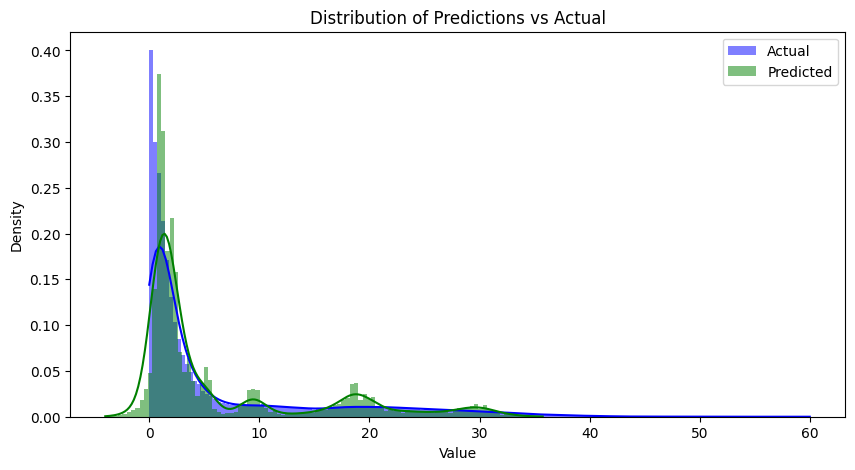

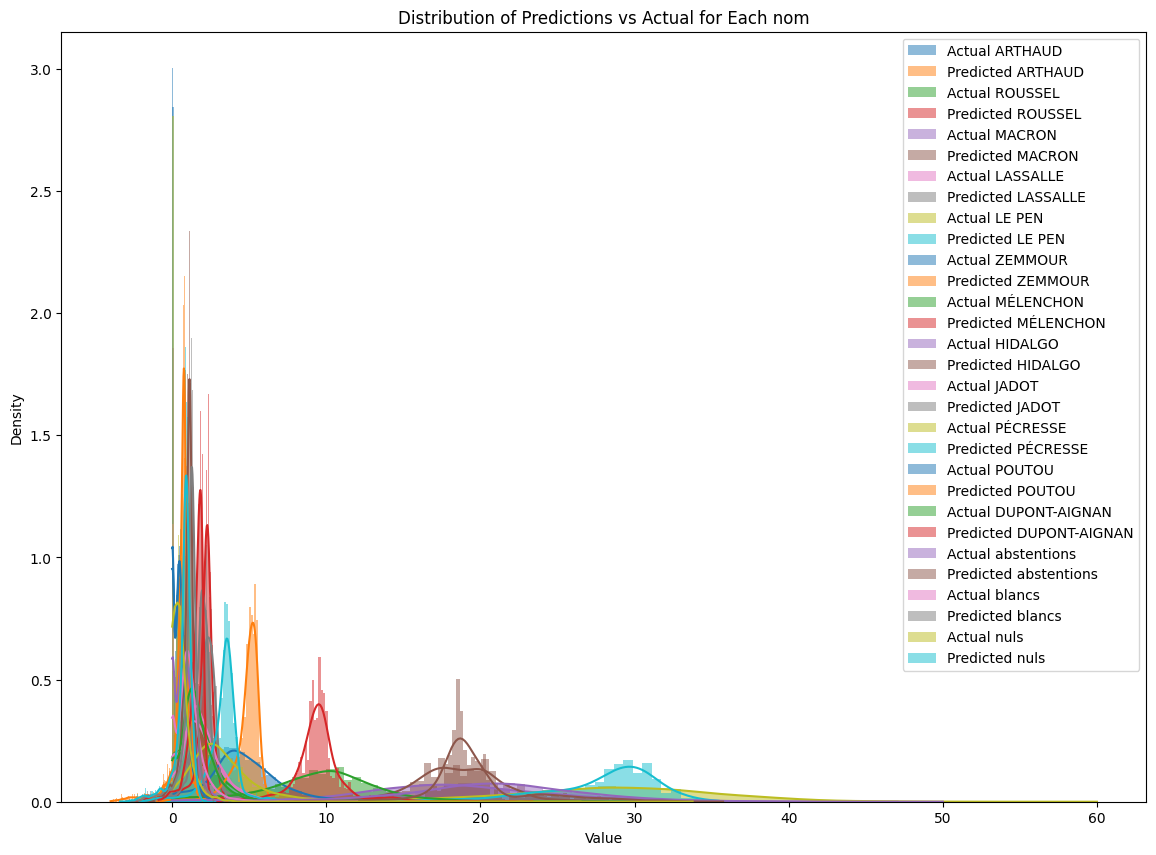

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe for visualization
df_results_nom = pd.DataFrame({'Actual': y_test.values.ravel() , 'Predicted': y_pred.flatten(), 'nom': df_all['nom']})

# Visualize the distribution of predictions vs. actual values
plt.figure(figsize=(10, 5))
sns.histplot(df_results_nom['Actual'], color='blue', kde=True, label='Actual', stat="density", linewidth=0)
sns.histplot(df_results_nom['Predicted'], color='green', kde=True, label='Predicted', stat="density", linewidth=0)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Predictions vs Actual')
plt.legend()
plt.show()

# Optionally, you can also visualize the distribution for each 'nom'
plt.figure(figsize=(14, 10))
for nom_value in df_results_nom['nom'].unique():
    subset = df_results_nom[df_results_nom['nom'] == nom_value]
    sns.histplot(subset['Actual'], kde=True, label=f'Actual {nom_value}', stat="density", linewidth=0)
    sns.histplot(subset['Predicted'], kde=True, label=f'Predicted {nom_value}', stat="density", linewidth=0)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Predictions vs Actual for Each nom')
plt.legend()
plt.show()


In [10]:
df_all.columns

Index(['id', 'libdep', 'circo', 'part_pauvres_diff', 'part_modestes_diff',
       'part_medians_diff', 'part_plutot_aises_diff', 'part_aises_diff',
       'actemp', 'actcho', 'inactret', 'age_moyen', 'libelle_commune',
       'total_voix_par_ville', 'catégorie', 'nom', 'voix', 'pourcentage_voix',
       'code_insee', 'insecurite', 'taux_chomage_moyen'],
      dtype='object')

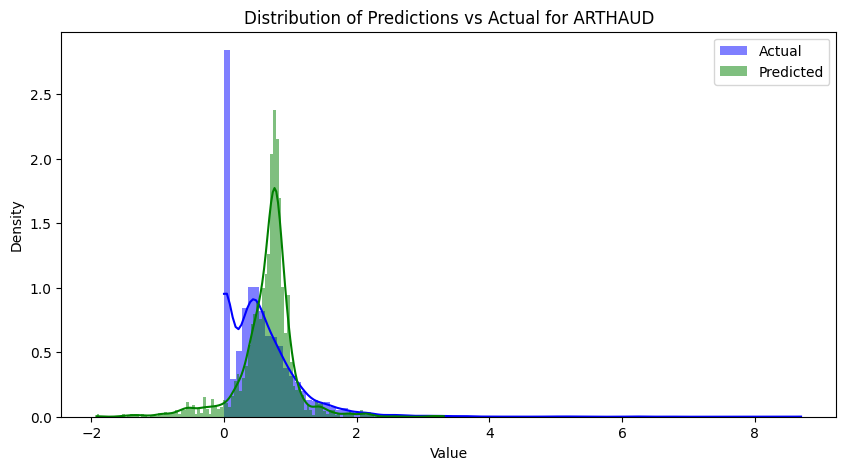

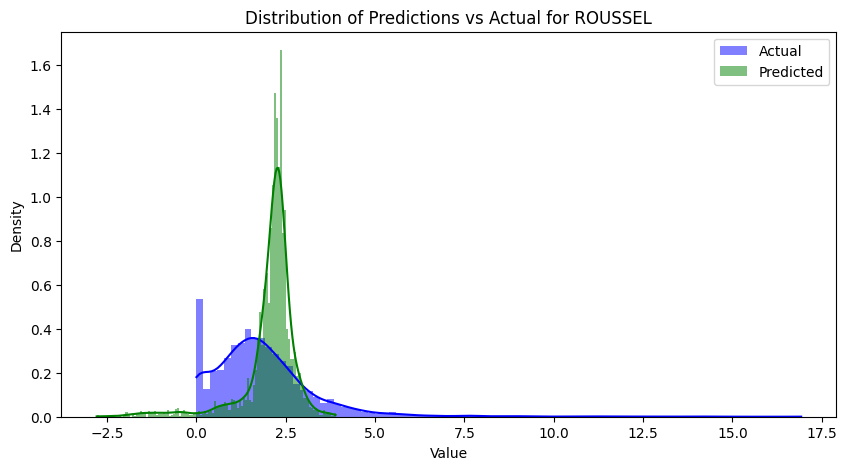

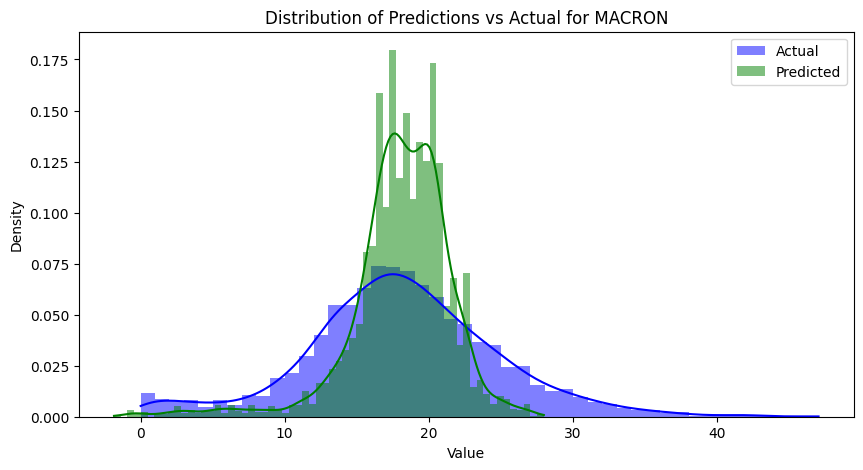

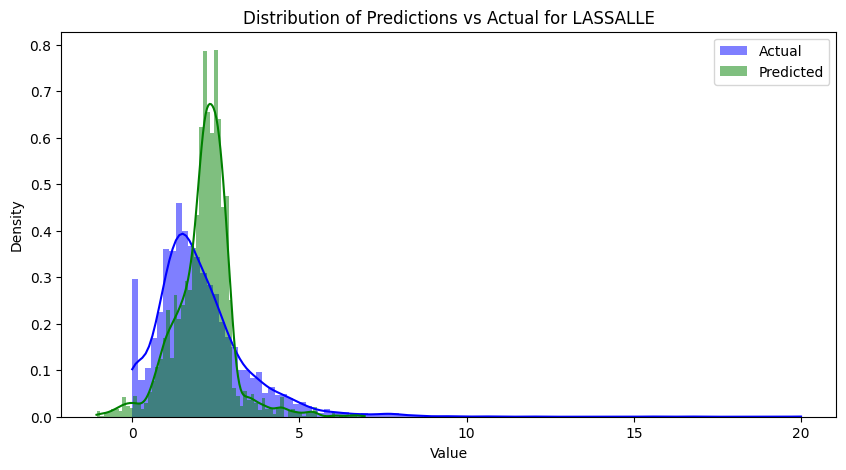

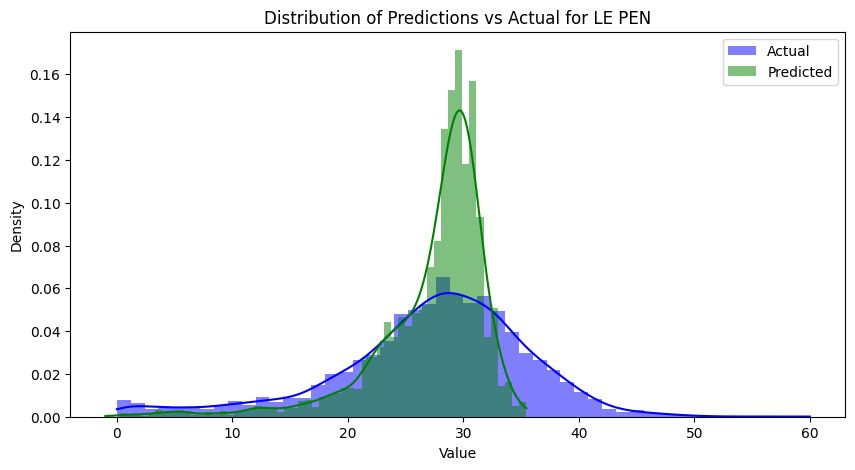

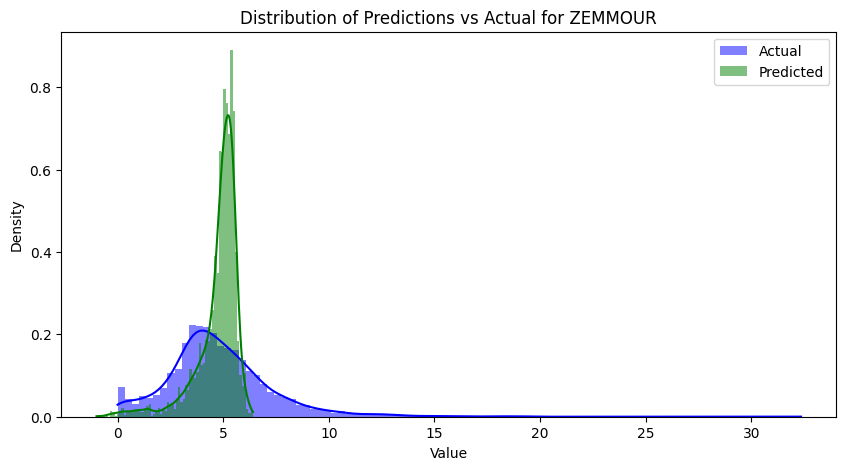

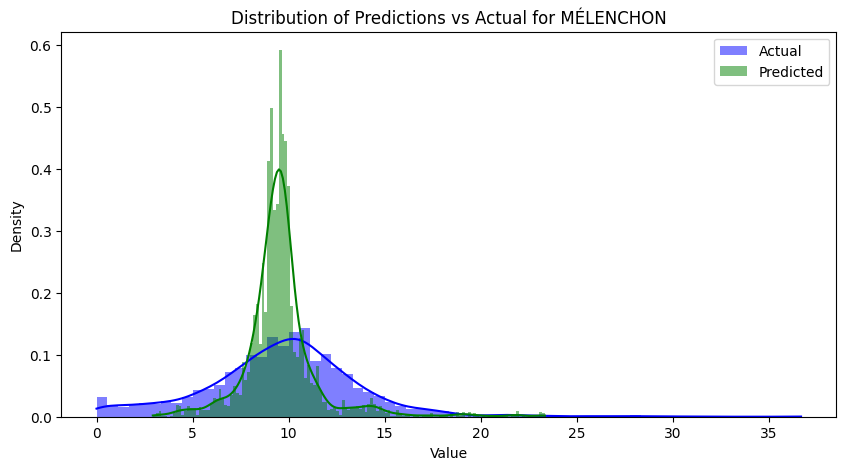

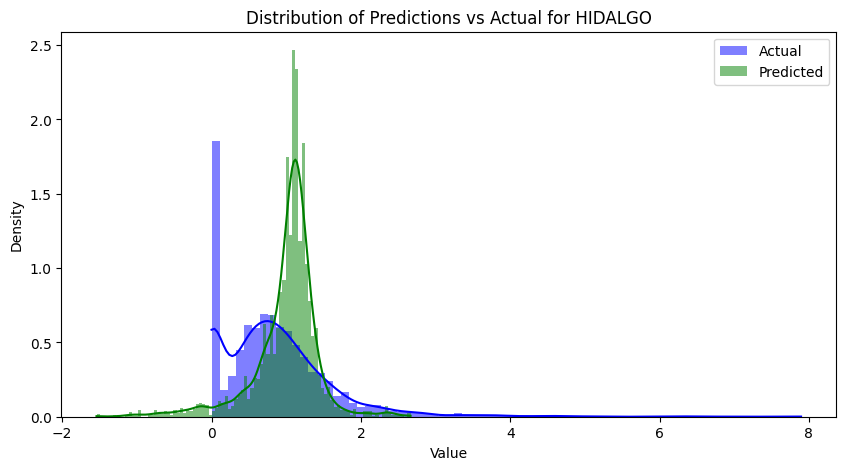

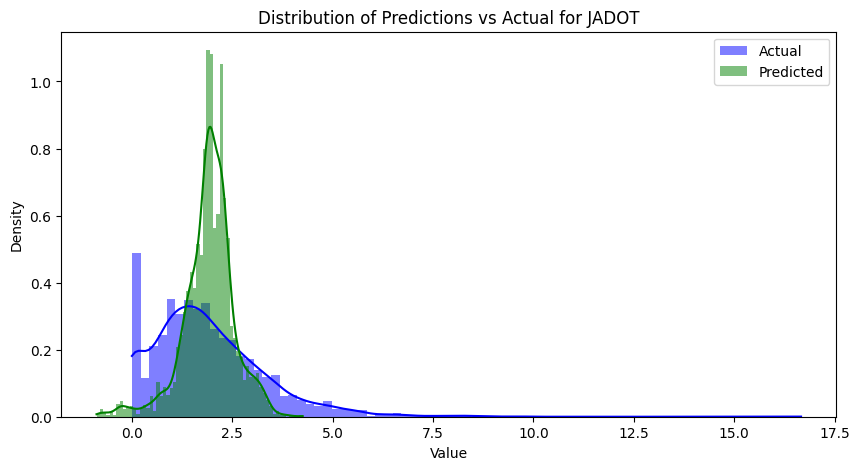

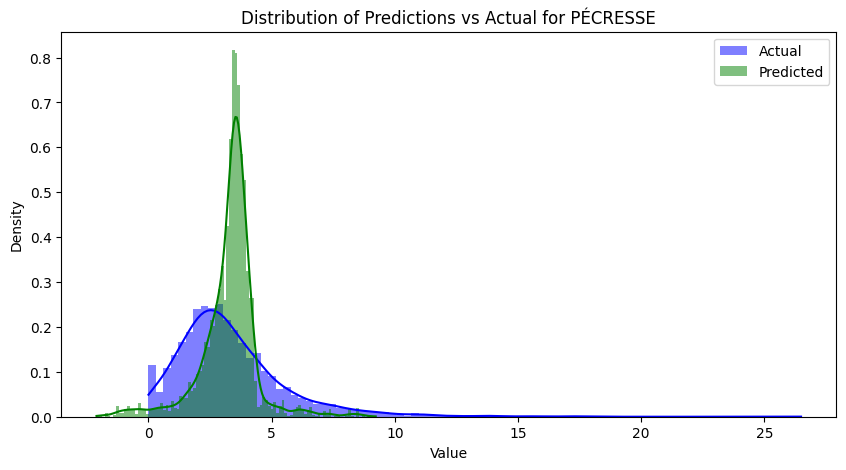

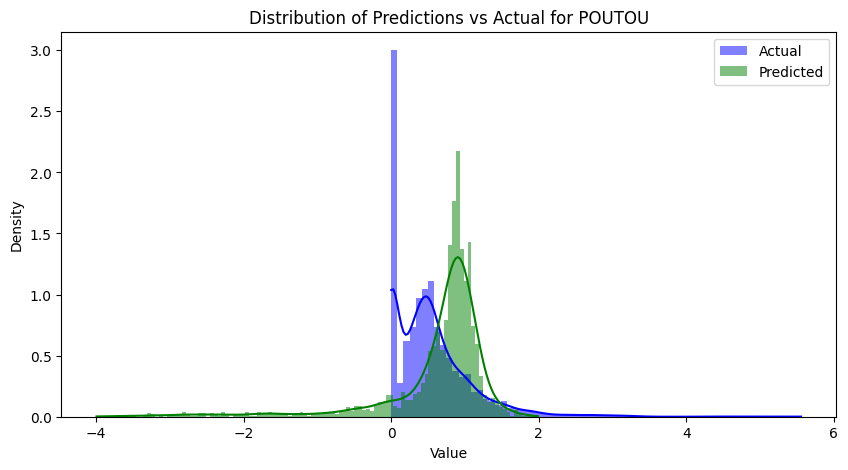

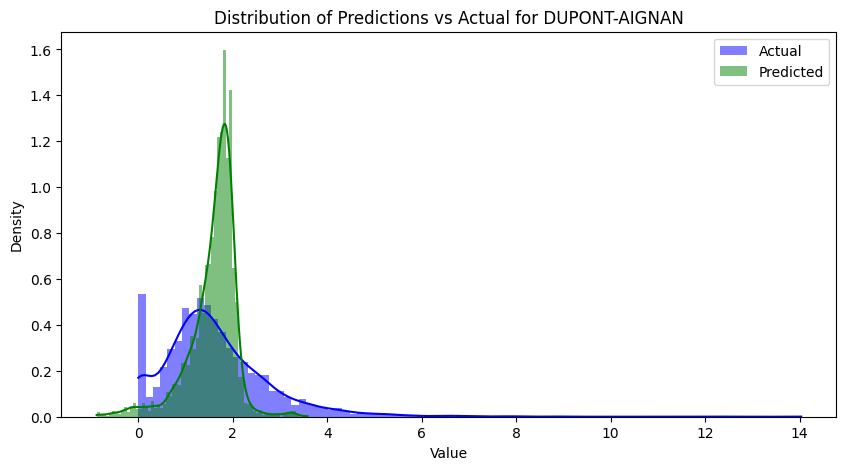

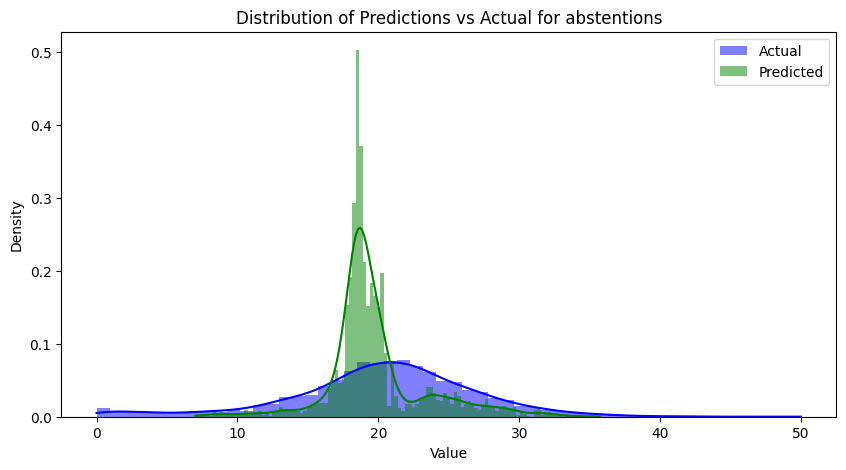

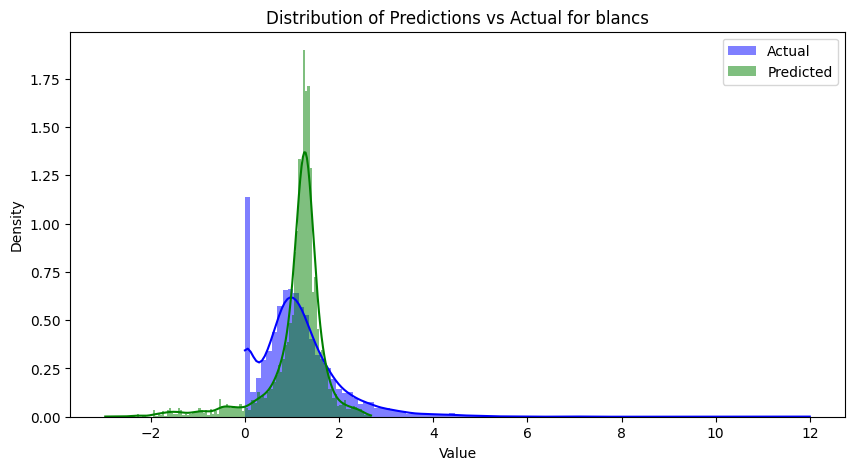

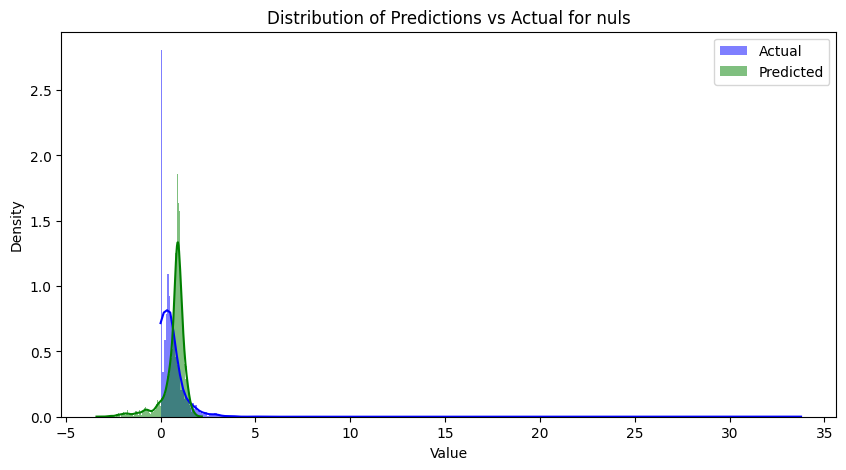

In [11]:
unique_noms = df_results_nom['nom'].unique()
for nom_value in unique_noms:
    subset = df_results_nom[df_results_nom['nom'] == nom_value]
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['Actual'], color='blue', kde=True, label='Actual', stat="density", linewidth=0)
    sns.histplot(subset['Predicted'], color='green', kde=True, label='Predicted', stat="density", linewidth=0)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of Predictions vs Actual for {nom_value}')
    plt.legend()
    plt.show()
    

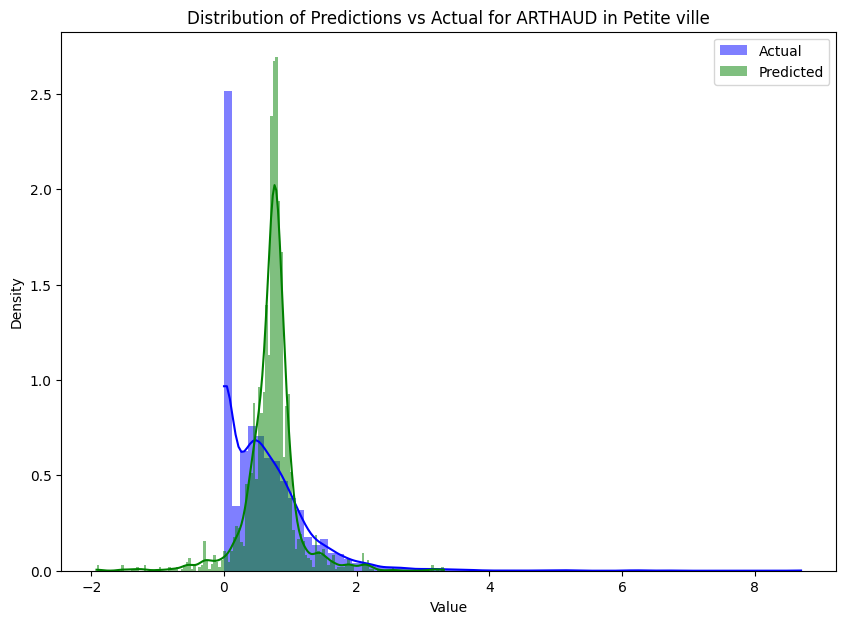

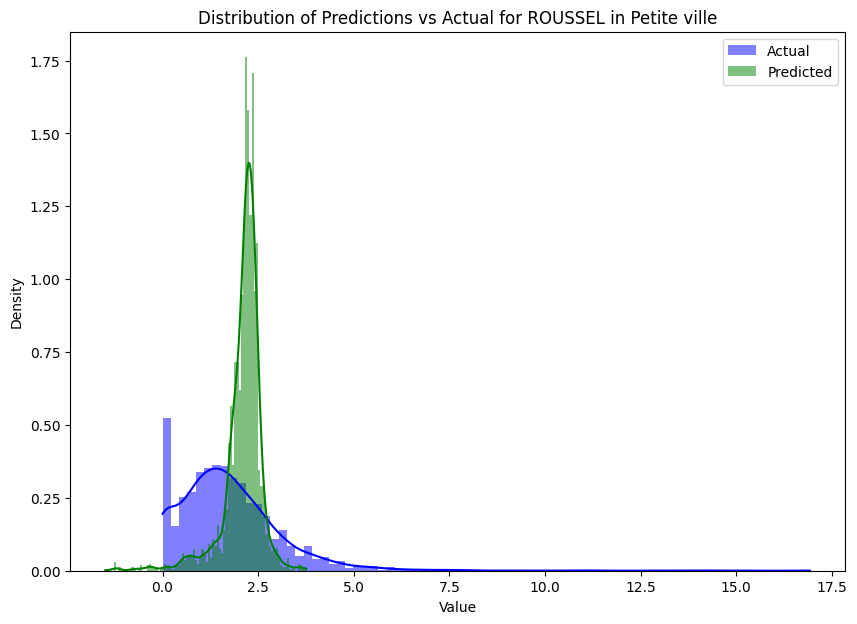

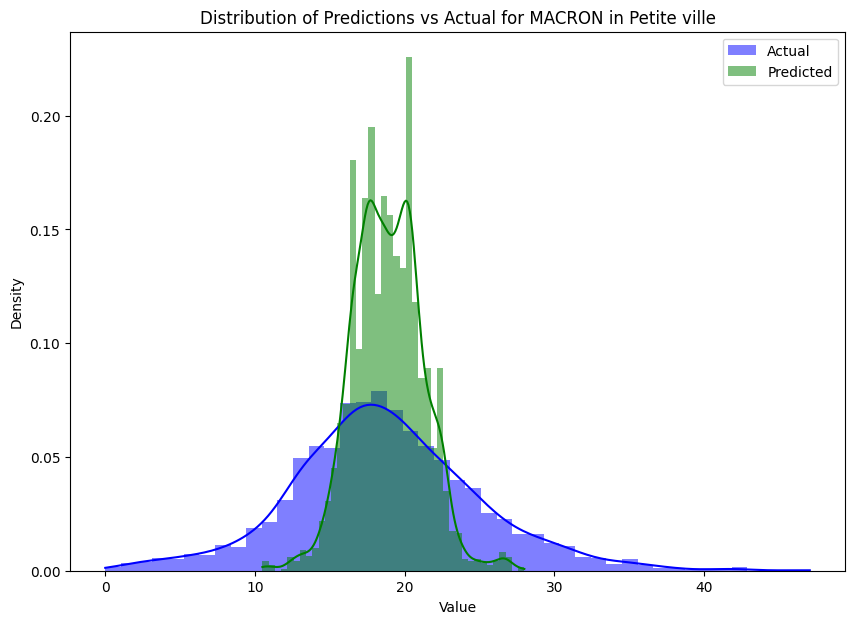

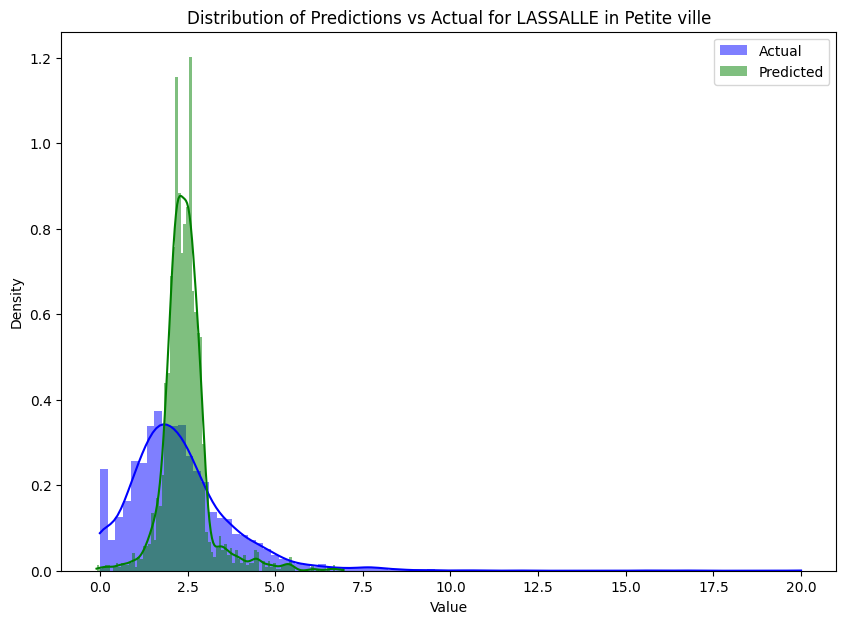

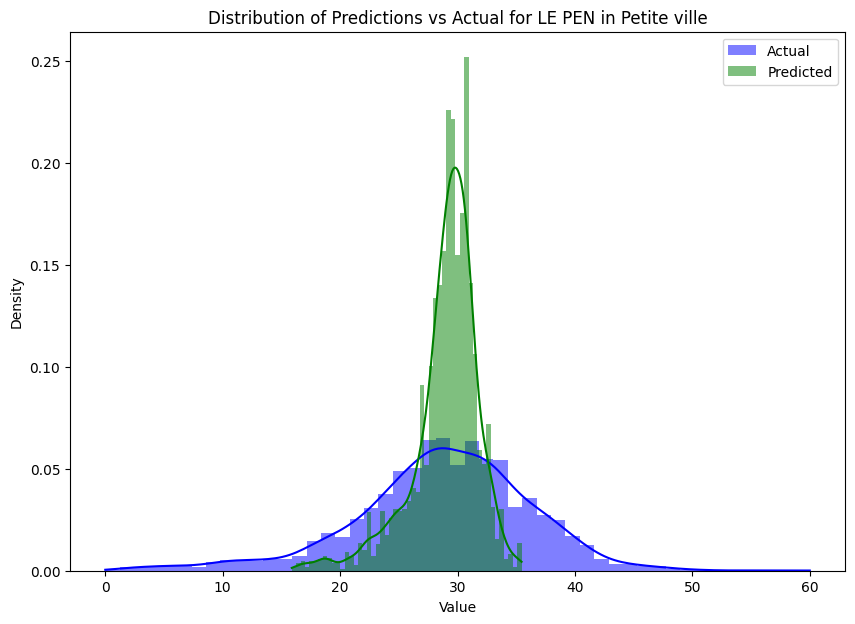

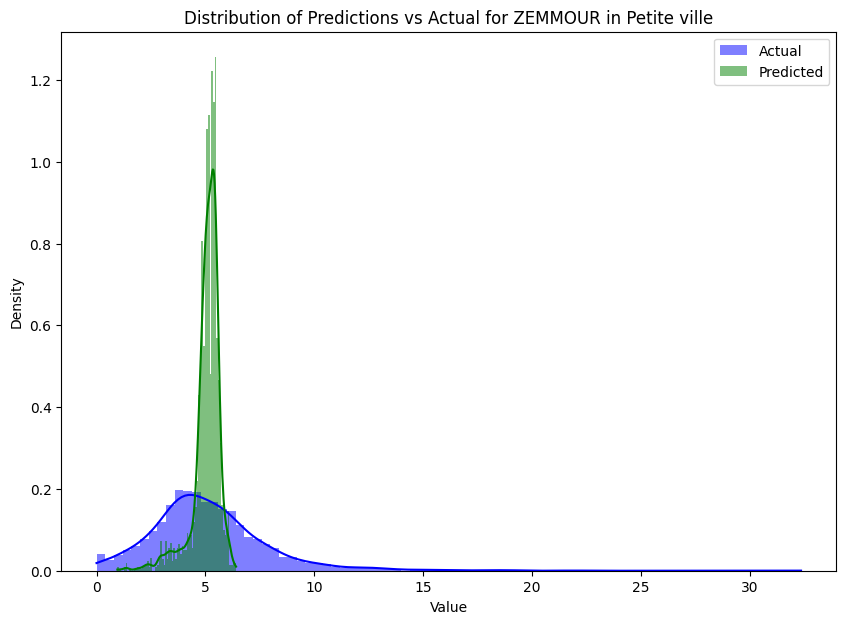

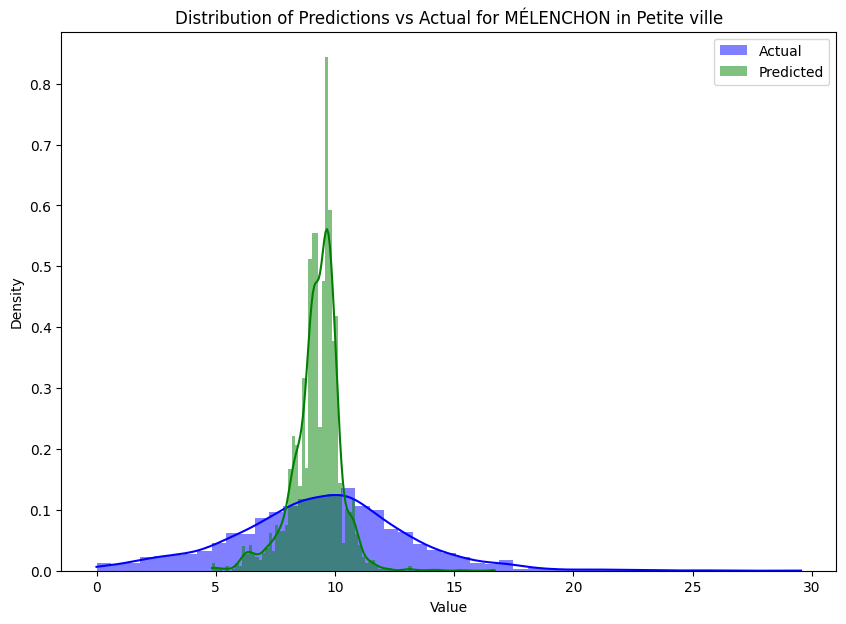

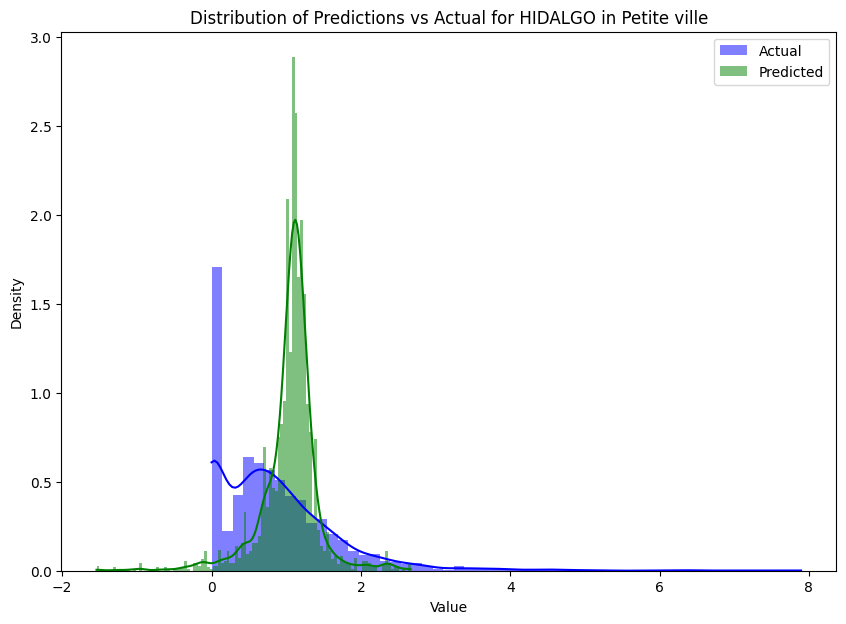

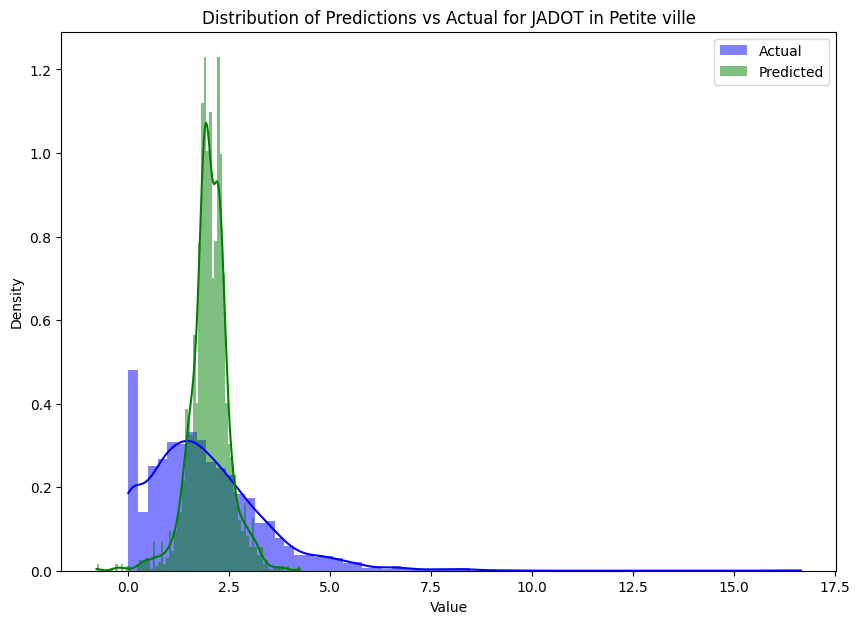

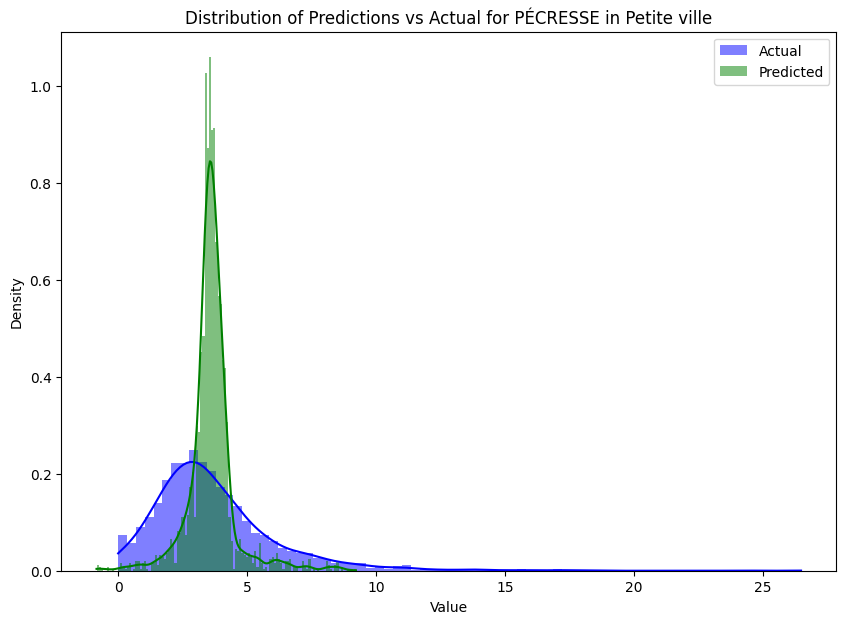

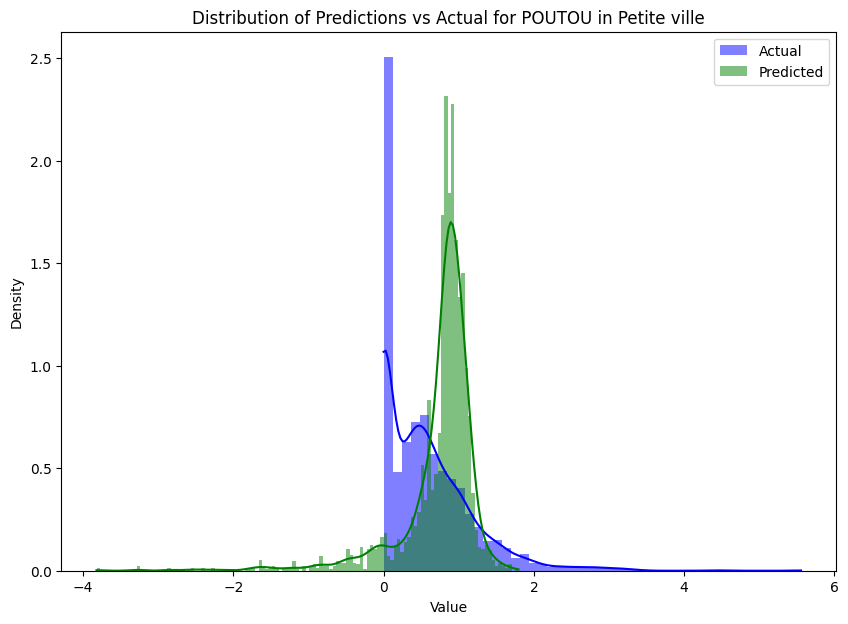

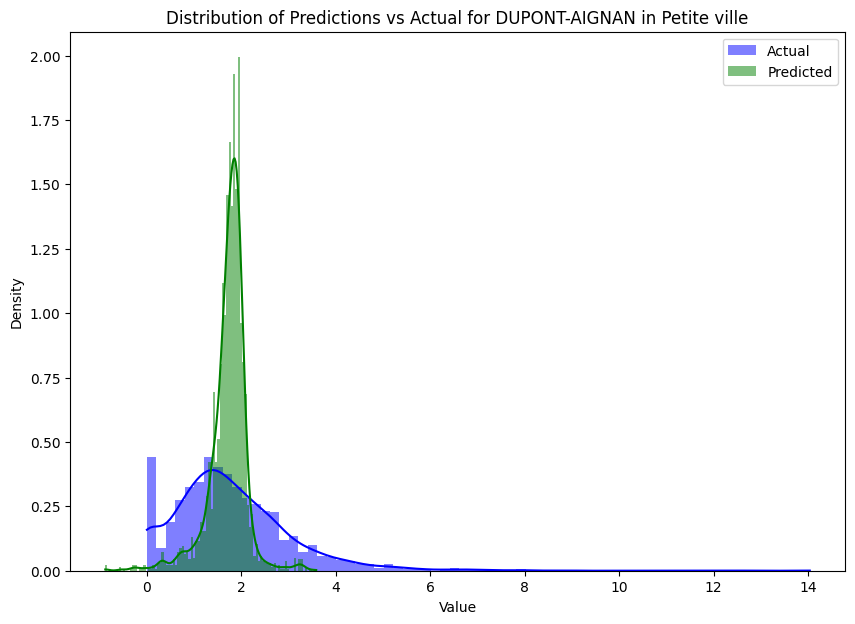

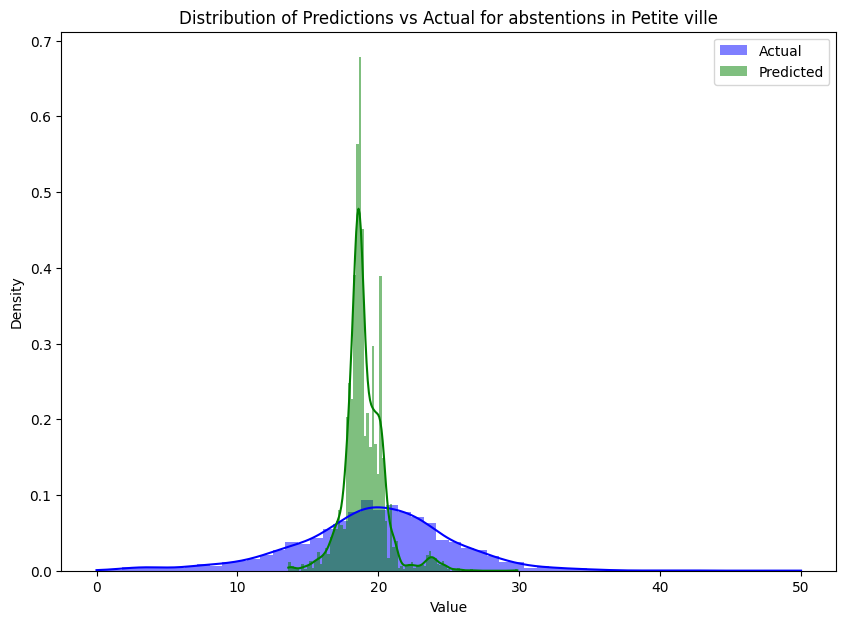

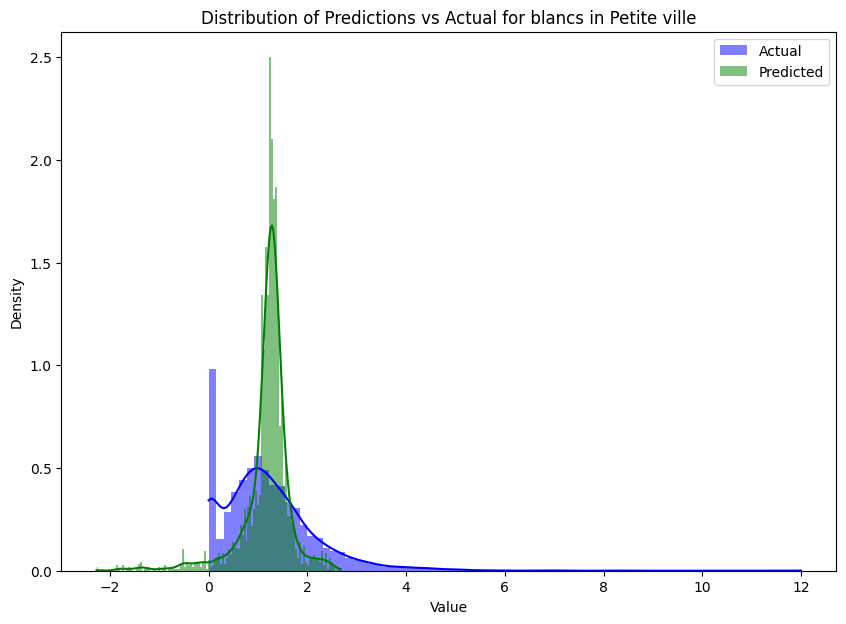

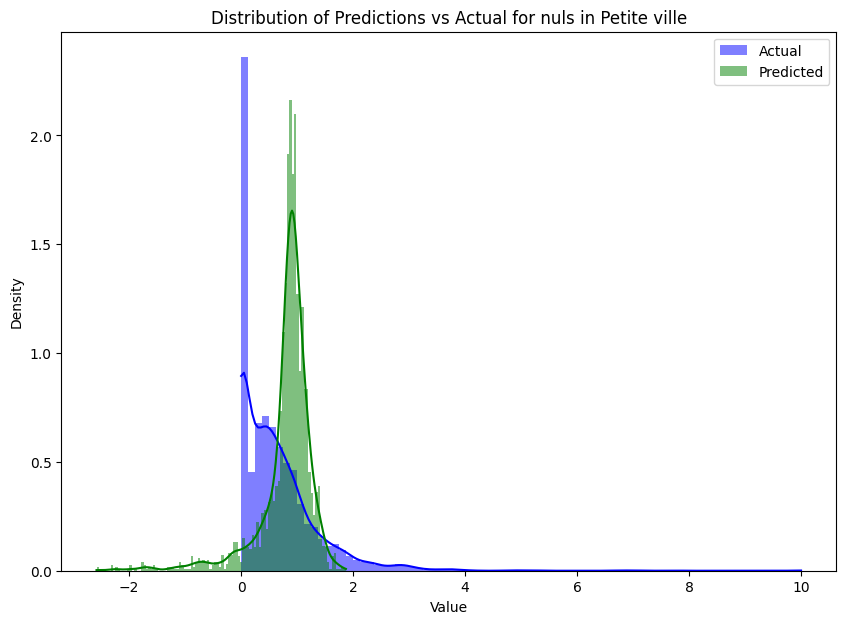

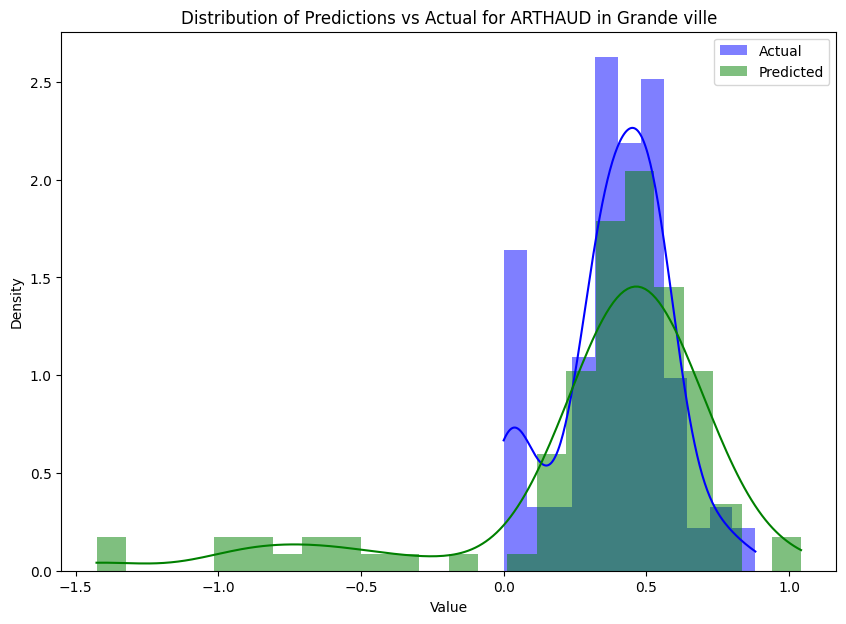

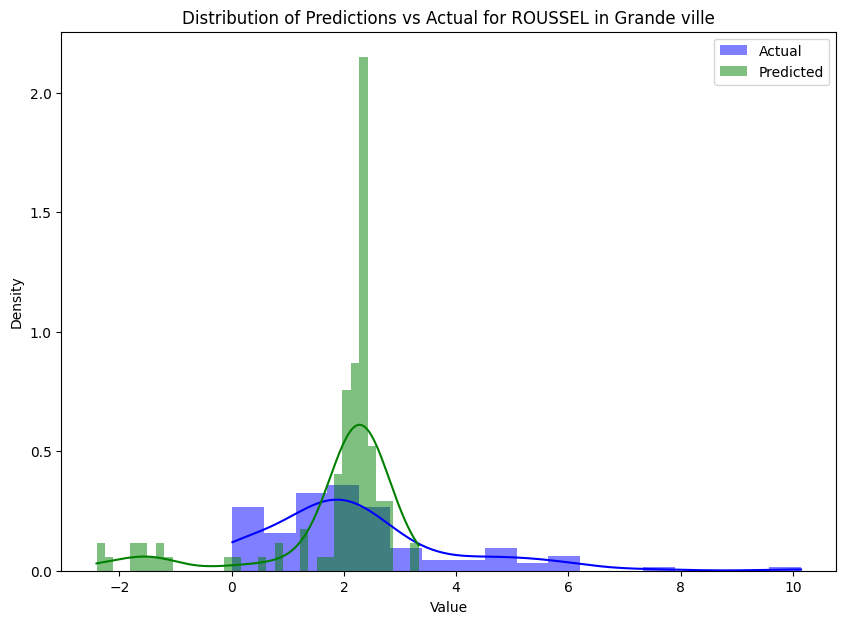

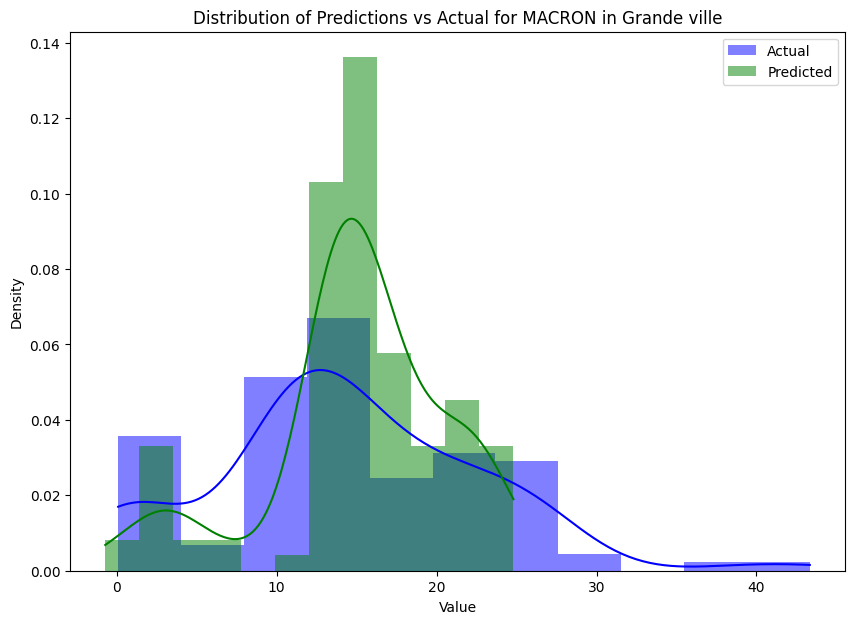

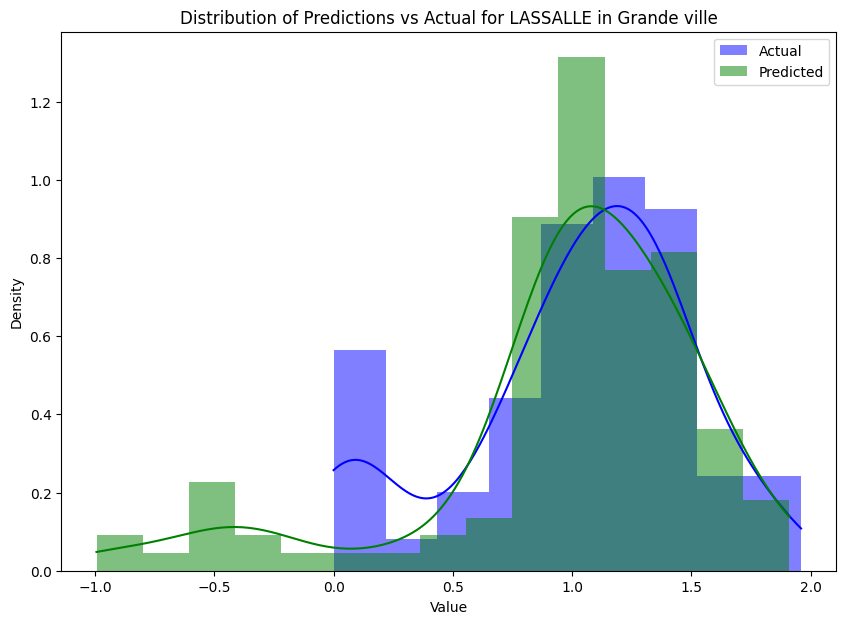

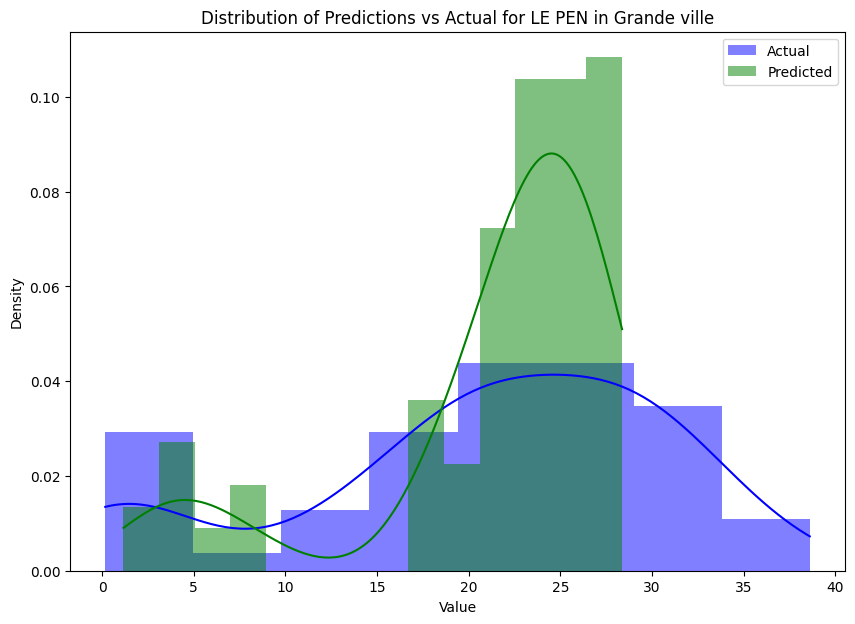

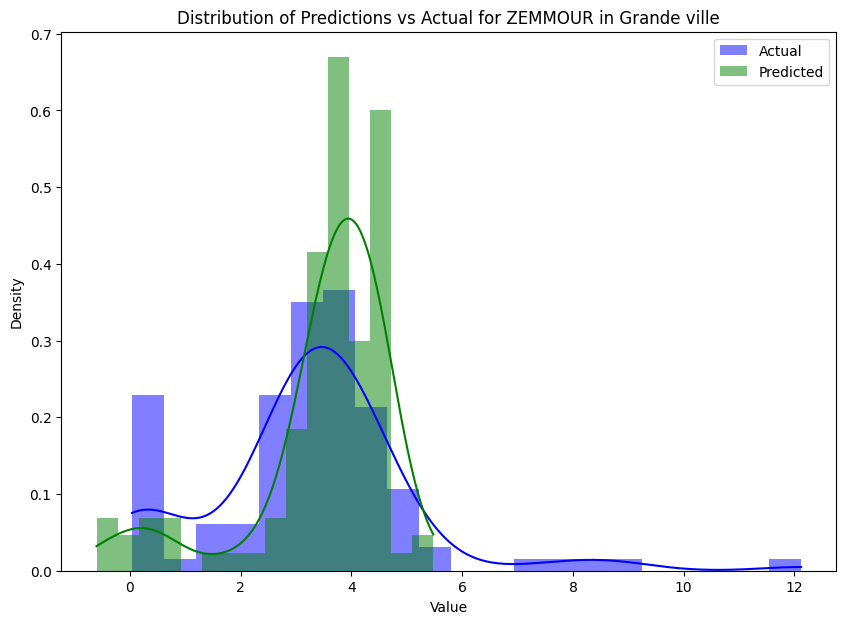

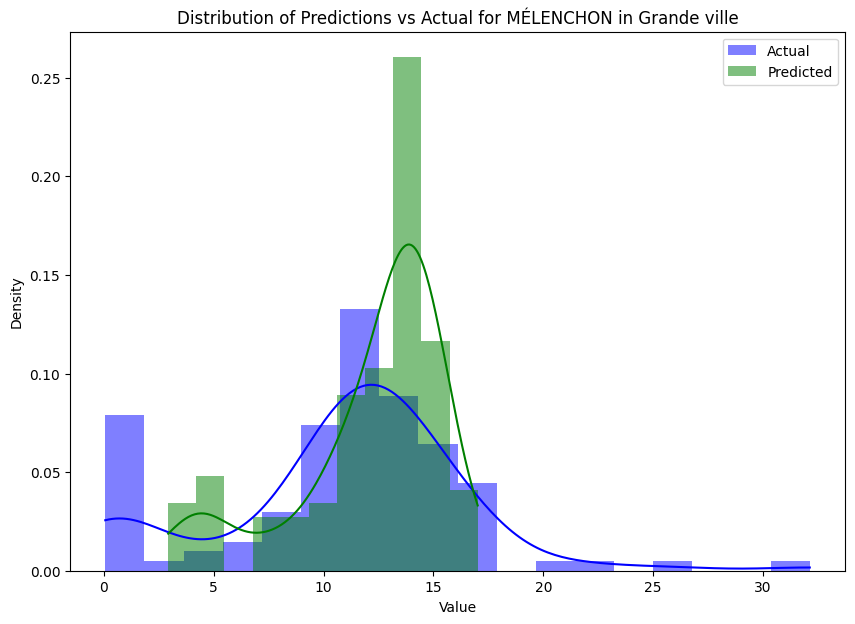

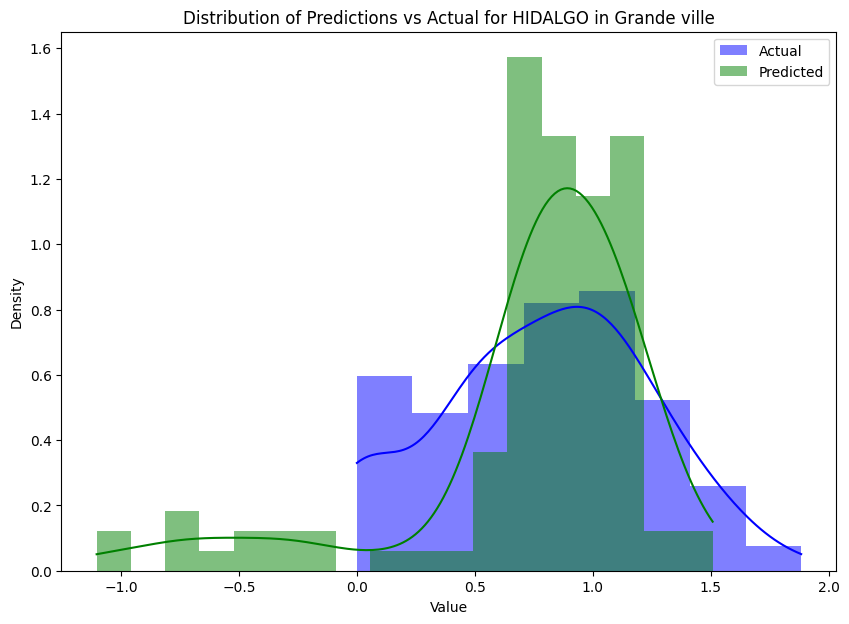

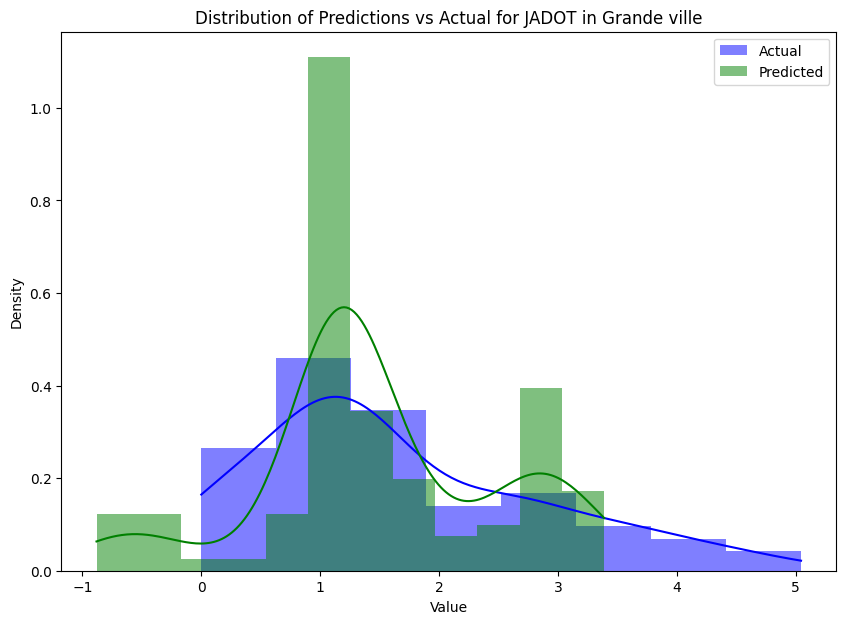

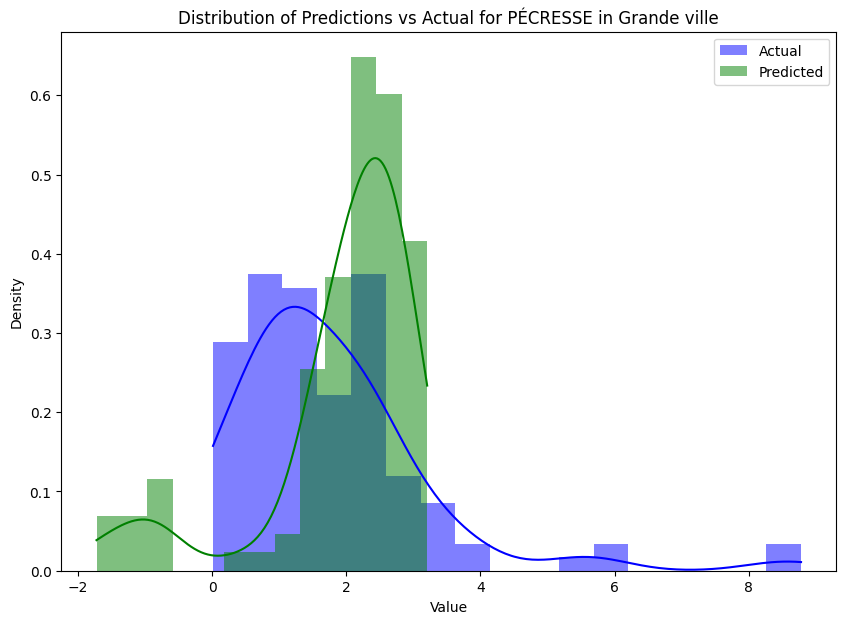

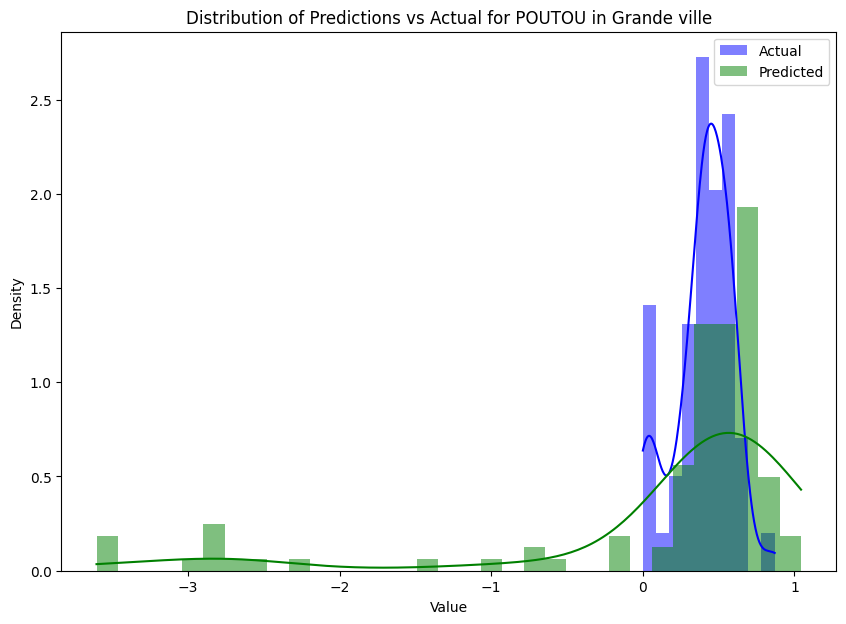

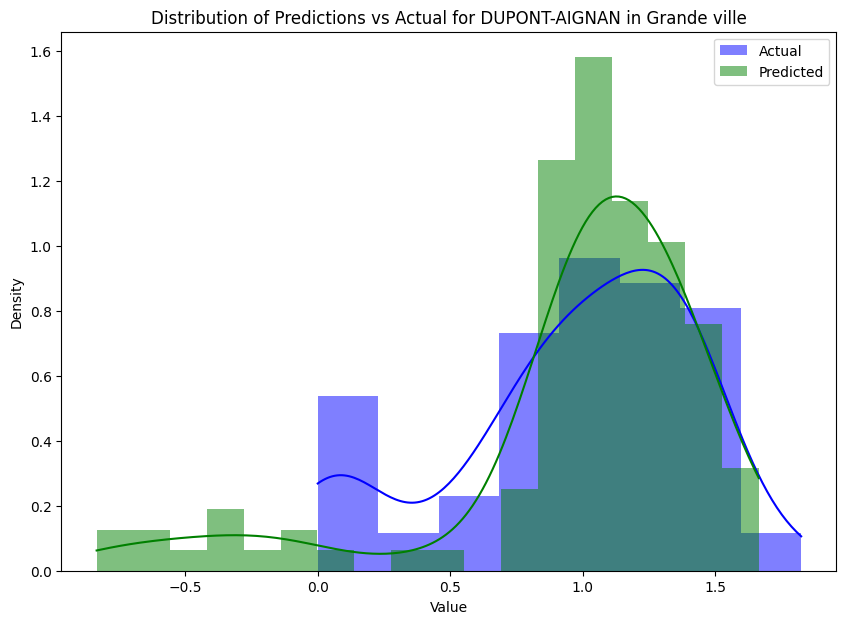

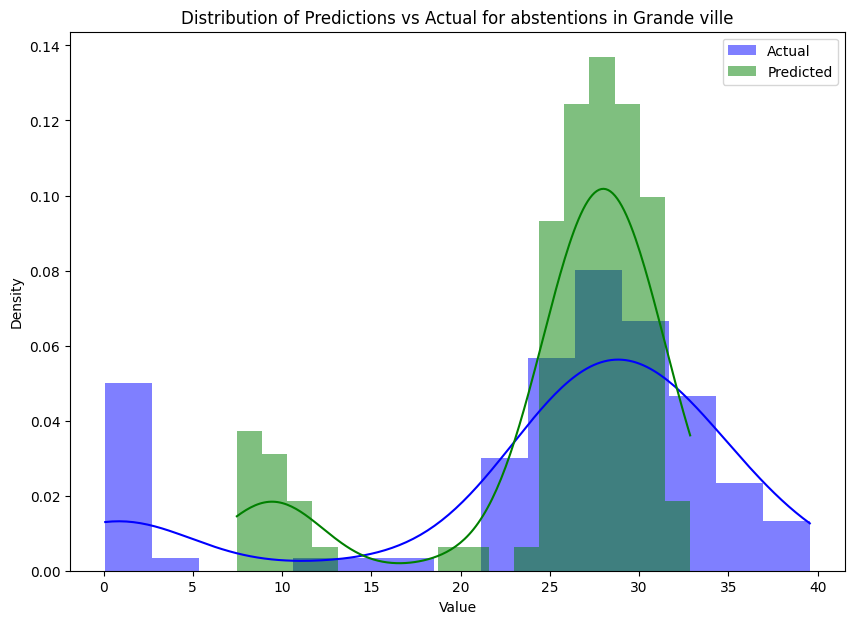

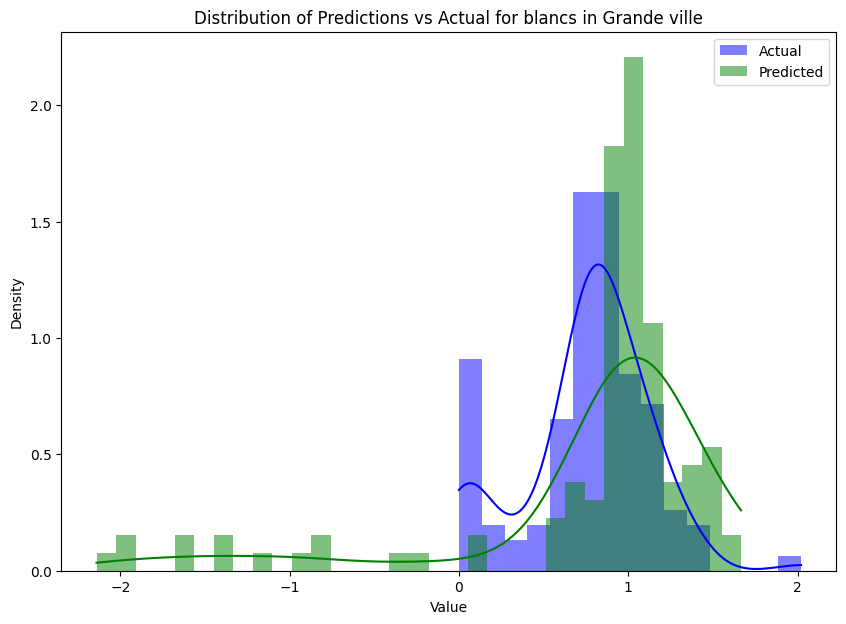

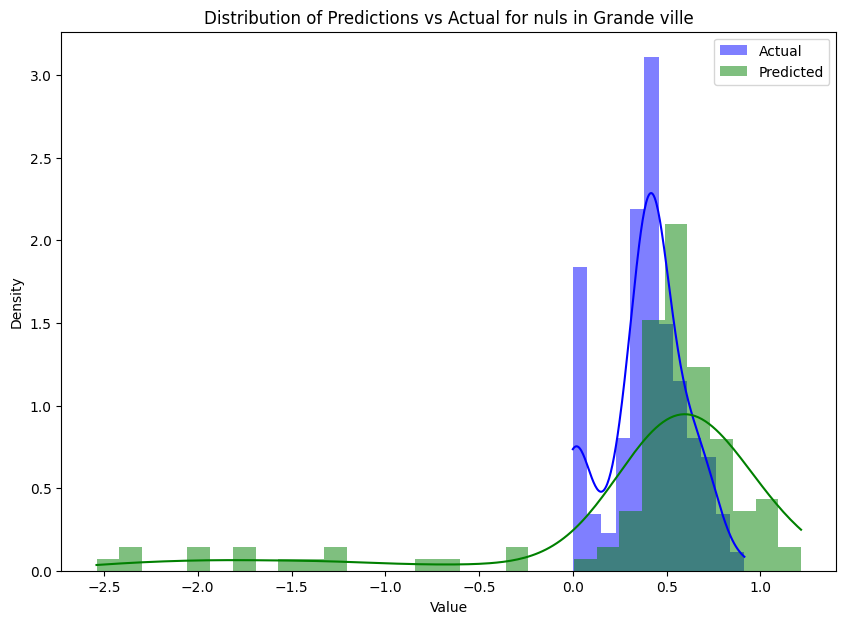

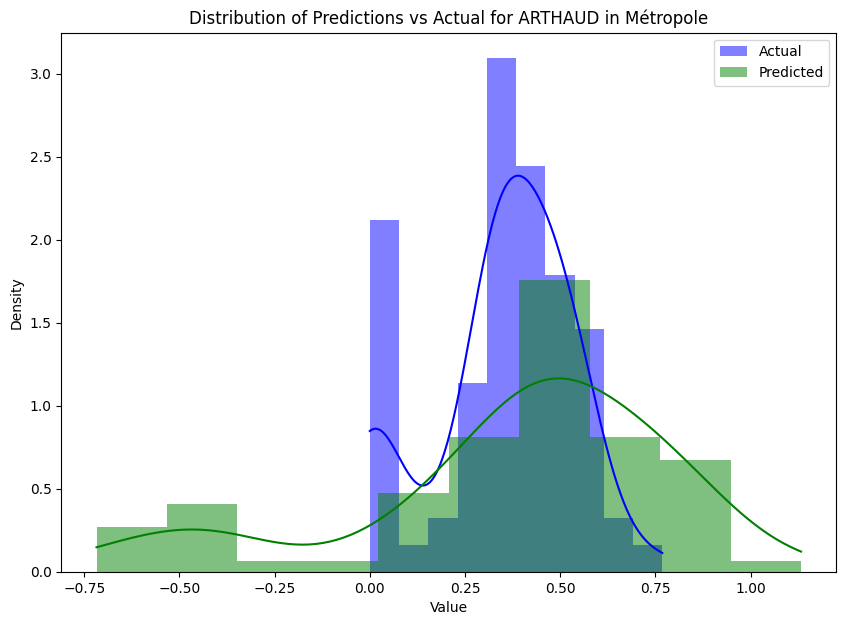

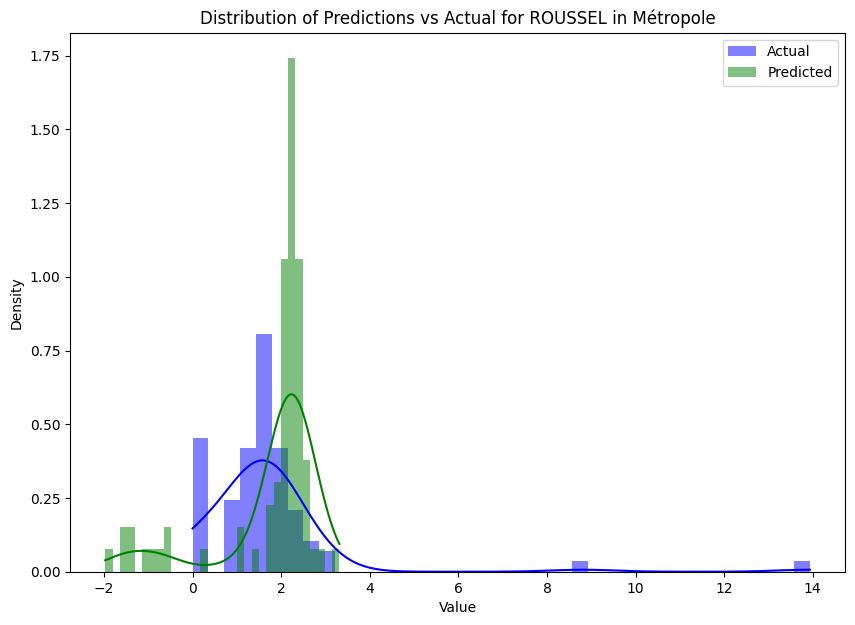

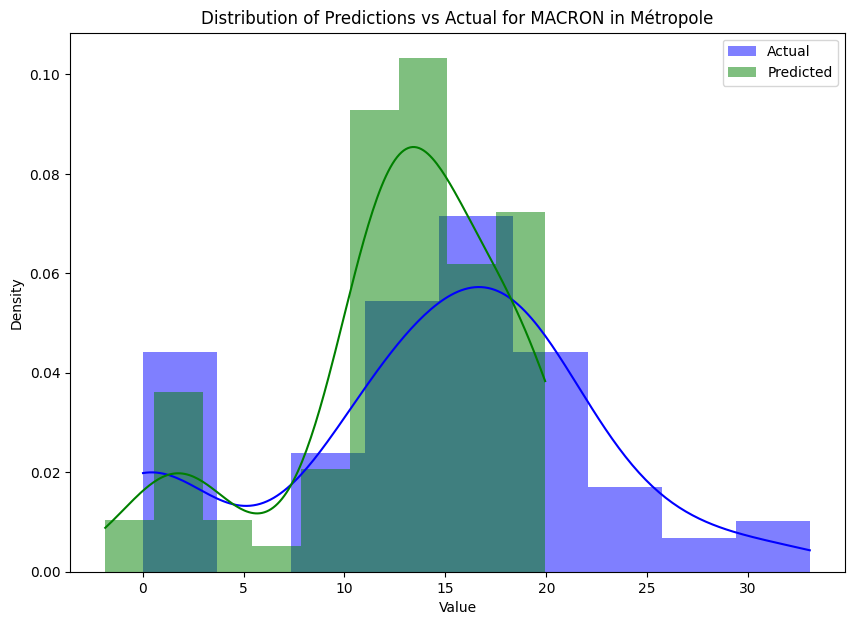

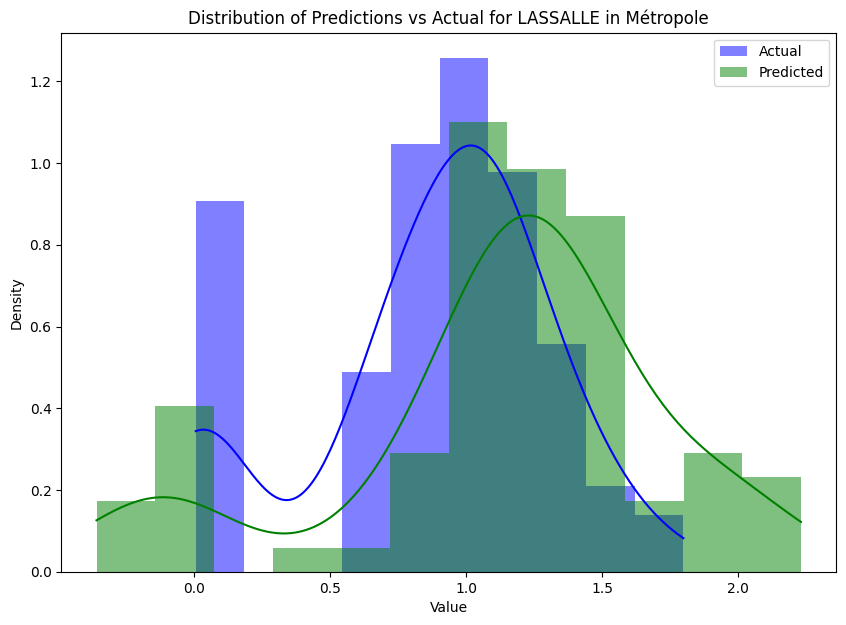

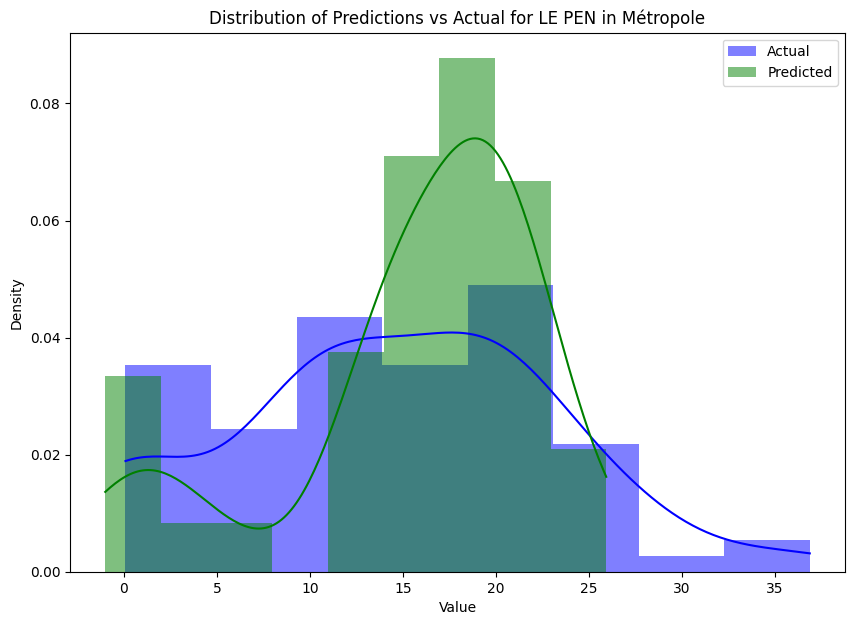

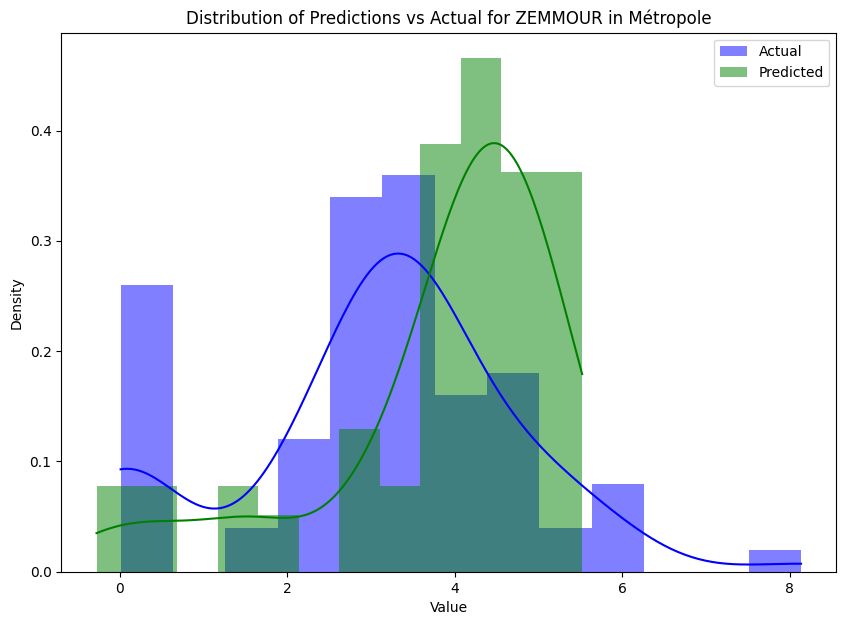

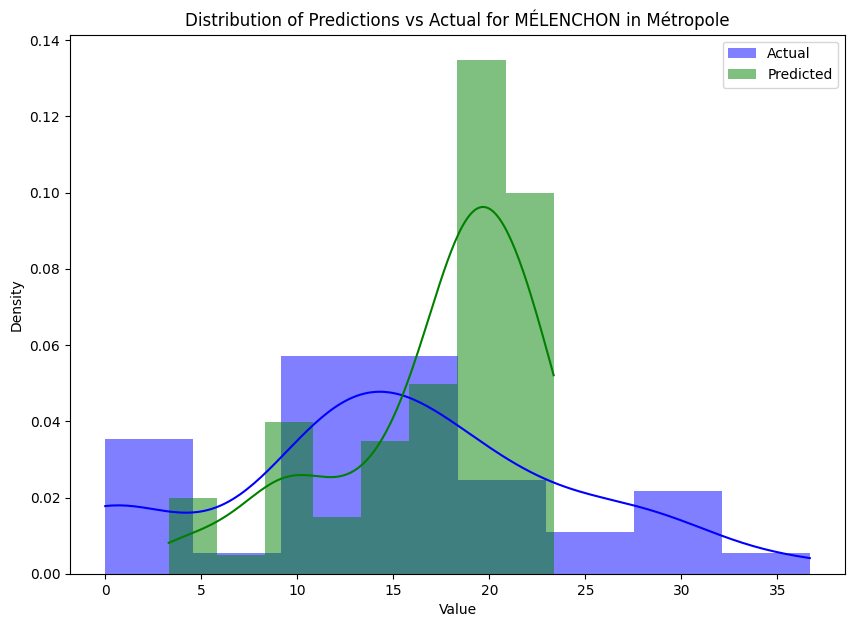

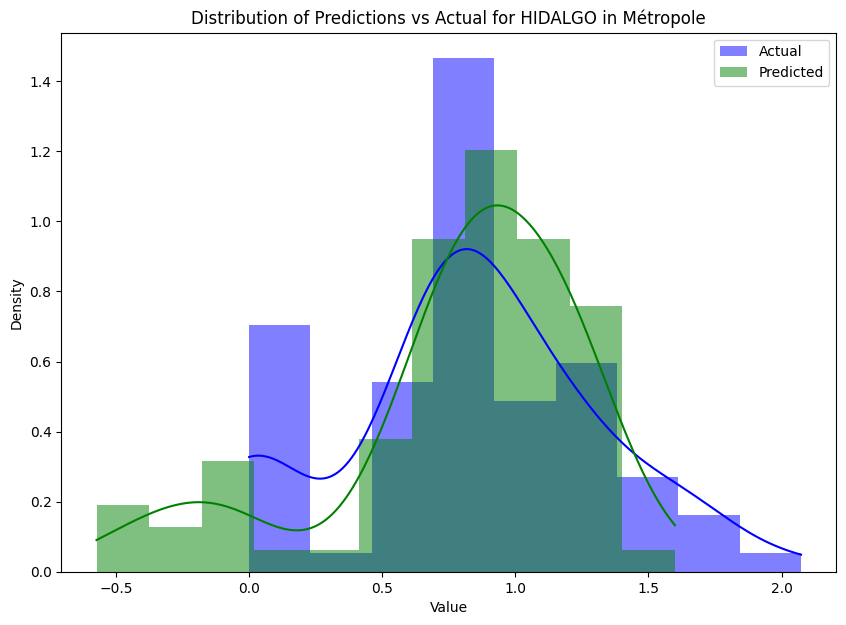

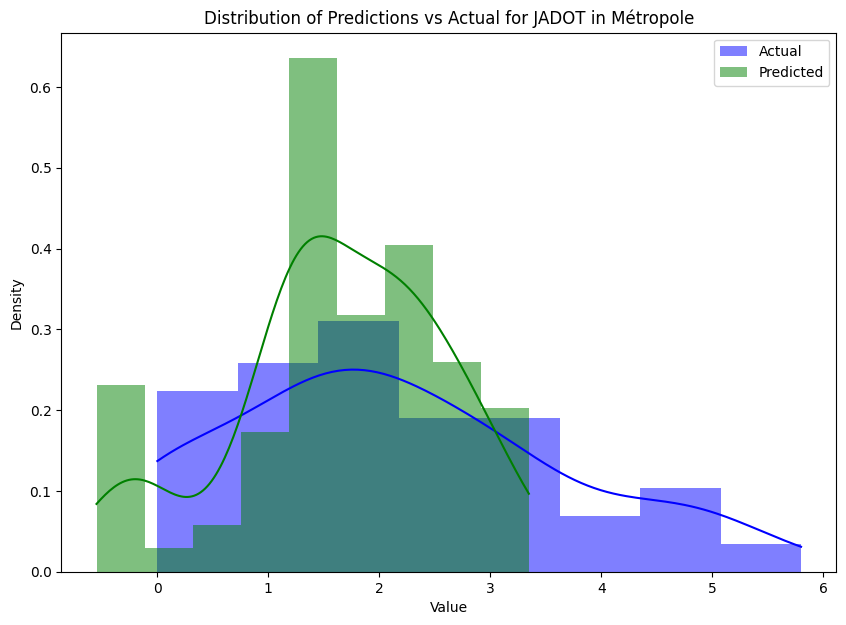

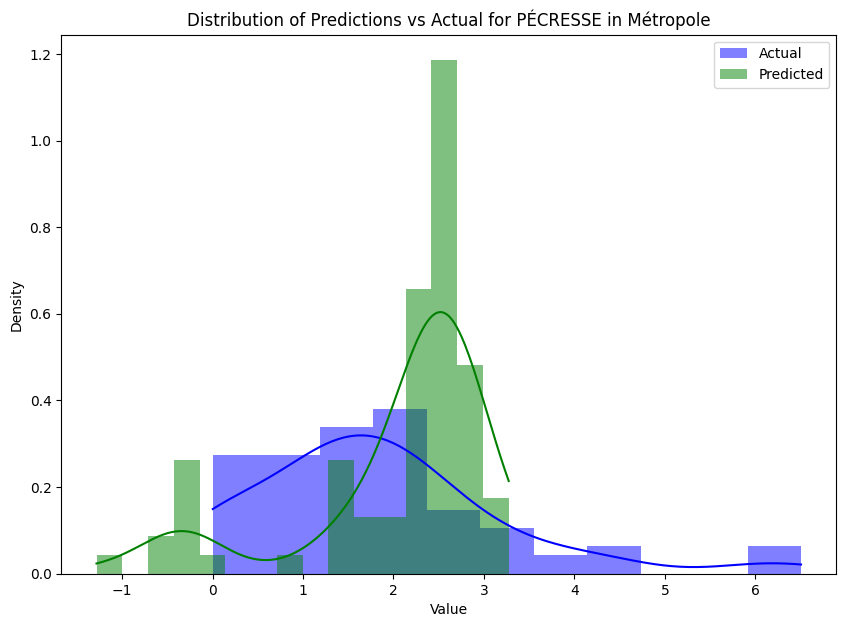

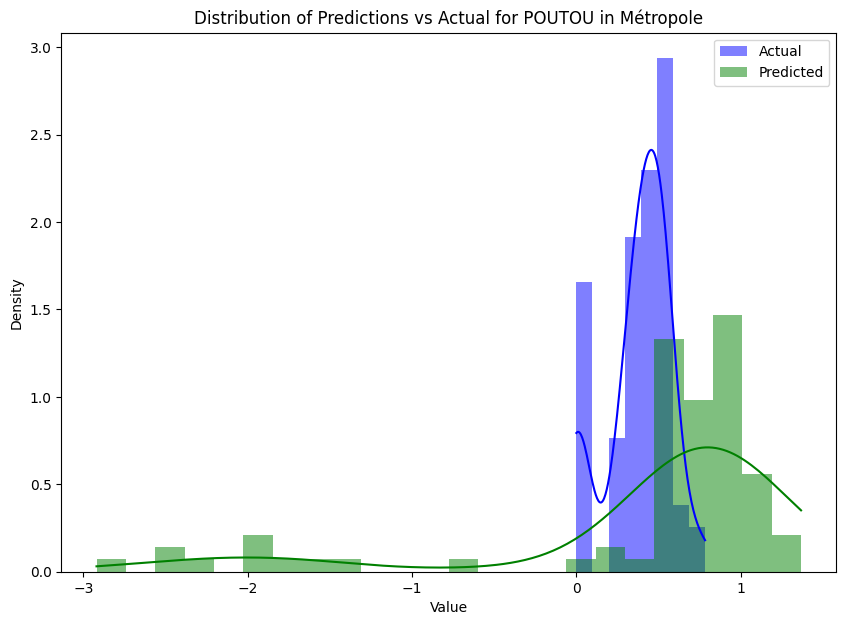

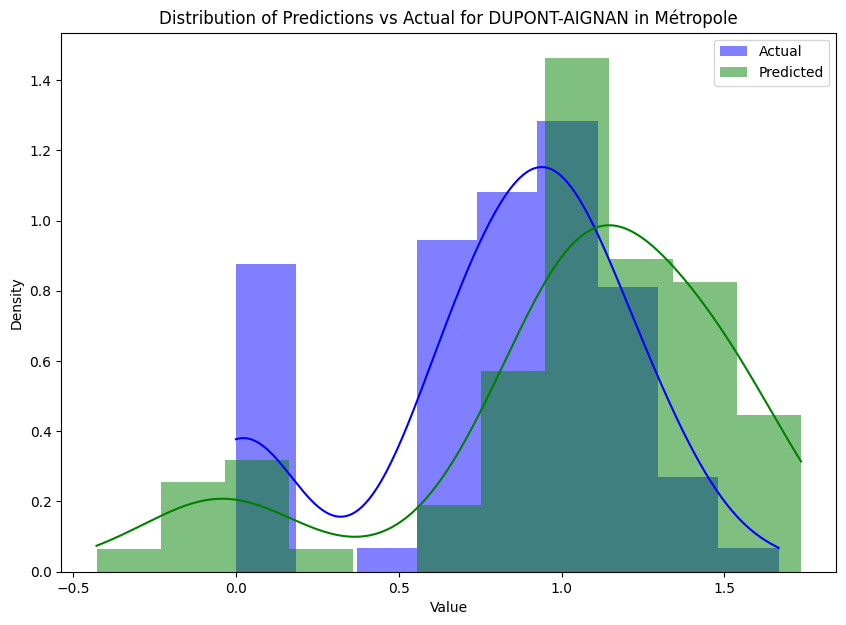

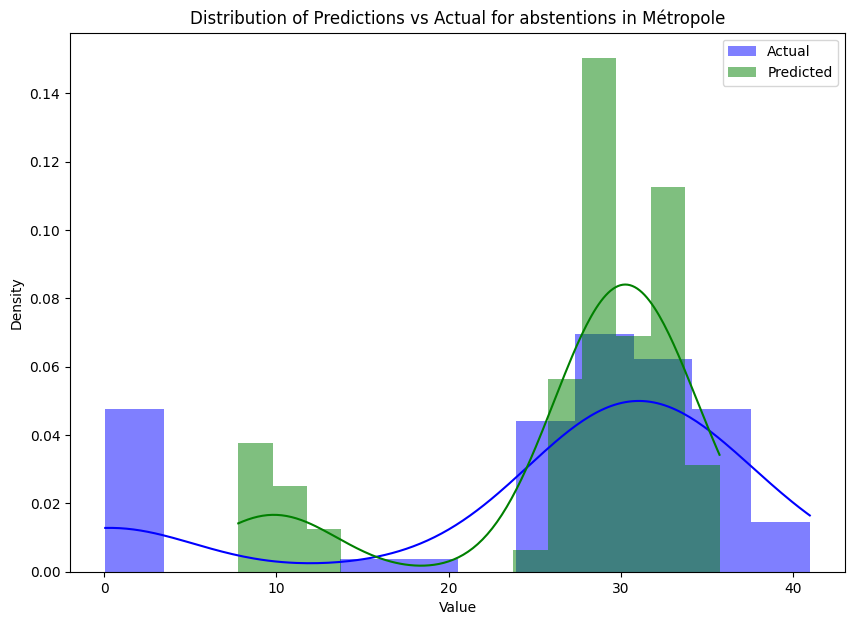

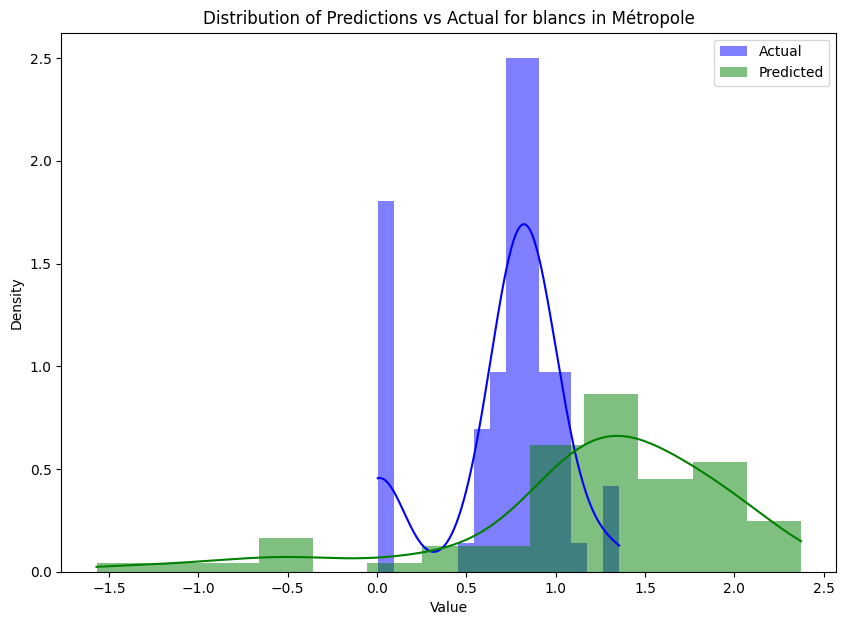

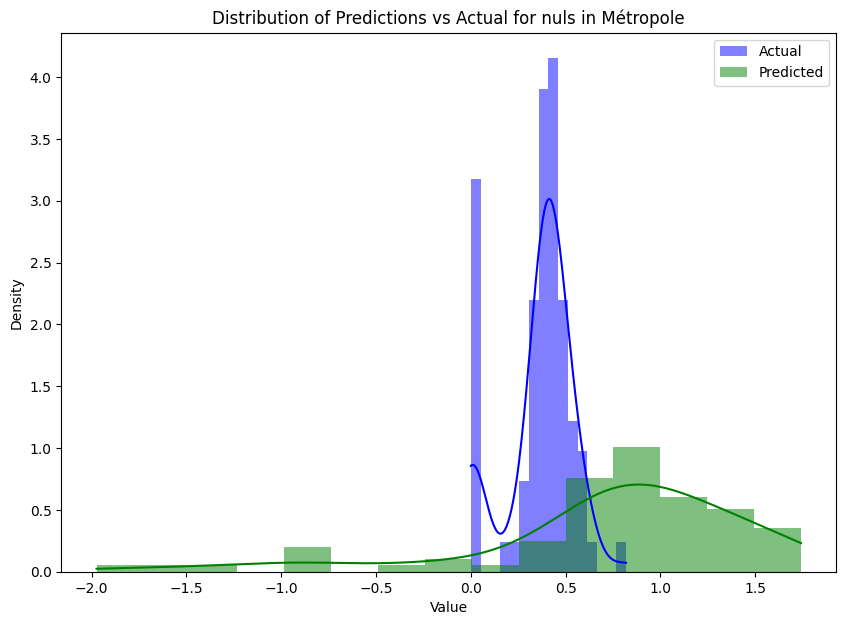

In [12]:
df_results = pd.DataFrame({'Actual': y_test.values.ravel() , 'Predicted': y_pred.flatten(), 'nom': df_all['nom'], 'catégorie': df_all['catégorie']})
labels = ['Petite ville', 'Petite moyenne ville', 'Grande ville', 'Métropole']
for category in labels:

    filtered_df = df_results[df_results['catégorie'] == category]

    # Generate individual histograms for each 'nom' within the specific category
    unique_noms = filtered_df['nom'].unique()
    for nom_value in unique_noms:
        subset = filtered_df[filtered_df['nom'] == nom_value]
        plt.figure(figsize=(10, 7))
        sns.histplot(subset['Actual'], color='blue', kde=True, label='Actual', stat="density", linewidth=0)
        sns.histplot(subset['Predicted'], color='green', kde=True, label='Predicted', stat="density", linewidth=0)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Distribution of Predictions vs Actual for {nom_value} in {category}')
        plt.legend()
        plt.show()


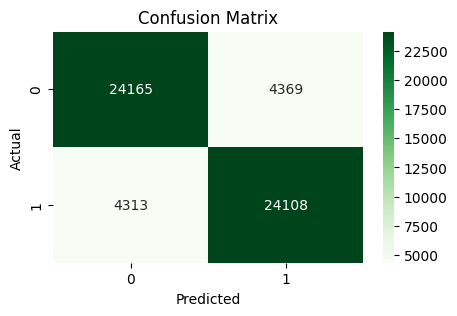

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_test_bin = np.where(y_test > y_test.median(), 1, 0)
y_pred_bin = np.where(y_pred > np.median(y_pred), 1, 0)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test_bin, y_pred_bin)

# Visualisation
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
import shap
df_alea = pd.read_csv('./donnees_aleatoires.csv')
df_alea['nom'] = le.transform(df_alea['nom'])

y_train = df_alea[['pourcentage_voix']].copy()

X_train= df_alea[["part_pauvres_diff","part_modestes_diff","part_medians_diff","part_plutot_aises_diff",
                 "part_aises_diff","actemp","actcho","inactret","age_moyen","total_voix_par_ville","nom"
                 ,"insecurite","taux_chomage_moyen"]].copy()
X_train_summary = shap.kmeans(X_train, 10)

c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
  0%|          | 1/300 [00:01<06:10,  1.24s/it]c:\Users\vonku\Documents\EPSI\Projet MSPR Big Data I1\Development\MSPR-Analyse-de-donnees\venv\lib\site-packages\sklearn\base.py:49

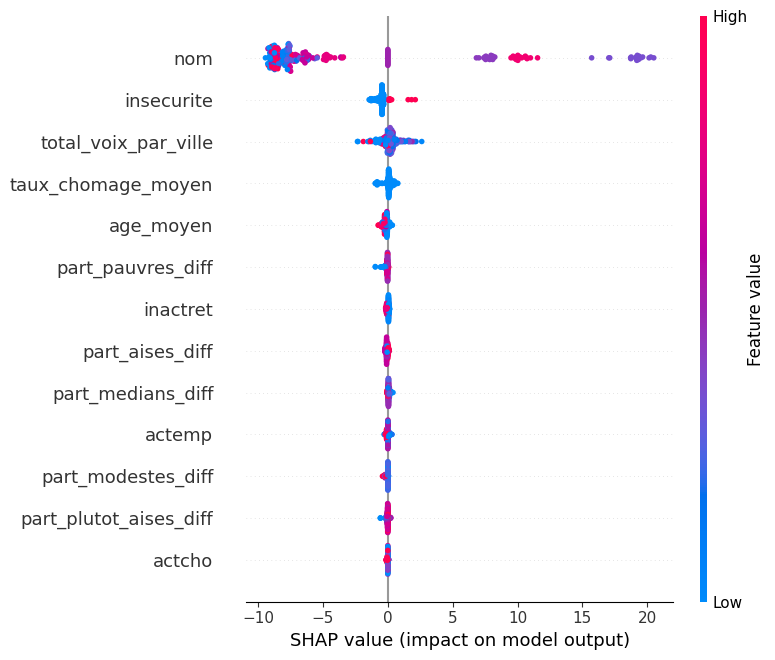

In [35]:
shap.initjs()

ex = shap.KernelExplainer(loaded_model.predict, data=X_train_summary)
shap_values = ex.shap_values(X_test.head(300))
shap.summary_plot(shap_values, X_test.head(300))
